This week is about logistic regression. Mostly used for classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op
from sklearn.linear_model import LogisticRegression

### Logistic regression

In [2]:
data = []
with open('./data/ex2data1.txt') as f:
    for line in f:
        data.append(line.strip().split(','))
data = np.array(data).astype(np.float64)
print(data.shape)

(100, 3)


In [3]:
X = data[:,:2]
y = data[:,2]

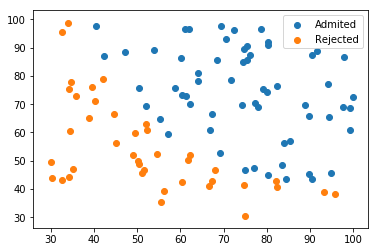

In [4]:
fig, ax = plt.subplots()
ax.scatter(X[y==1,0], X[y==1,1], label='Admited')
ax.scatter(X[y==0,0], X[y==0,1], label='Rejected')
ax.legend()
plt.show()

In [5]:
# scikit :)
reg = LogisticRegression(fit_intercept=True, C = 1e20, solver='lbfgs', max_iter=10000)
reg.fit(X,y)
reg.score(X,y)
print(reg.intercept_)
print(reg.coef_)

[-25.16138567]
[[0.20623222 0.20147191]]


In [6]:
def sigmoid(x):                                        
    return 1.0 / (1 + np.exp(-x))

In [7]:
def h(theta, X):
    return sigmoid(X.dot(theta))

In [8]:
def compute_cost(theta, X, y):
    m = len(y)
    return (1 / m) * (-y.T.dot(np.log(h(theta,X))) - (1 - y).T.dot(np.log(1 - h(theta,X))))

In [9]:
def gradient_descend(X, y, alpha=0.002, iters=1000, intercept=True, progress_track=False, _lambda=0.1):
    if intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    
    m, n = X.shape
    theta = np.zeros([n,1])
    y = y.reshape((m, 1))
    
    print('theta', theta.shape)
    print('X', X.shape)
    print('y', y.shape)
    
    cost = np.zeros(iters)
        
    for i in range(iters): 
        Z = np.matmul(X, theta)
        A = sigmoid(Z)
        dz = A - y
        dw = 1/m * np.matmul(X.T, dz)
        theta = theta - alpha * dw
        cost[i] = compute_cost(theta, X, y)
        if i % 100 == 0 and progress_track:
            print(cost[i])        
    return theta, cost

In [10]:
theta, cost = gradient_descend(X, y, alpha=0.001, iters=1000000, progress_track=False)
theta

theta (3, 1)
X (100, 3)
y (100, 1)


array([[-15.39517866],
       [  0.12825989],
       [  0.12247929]])

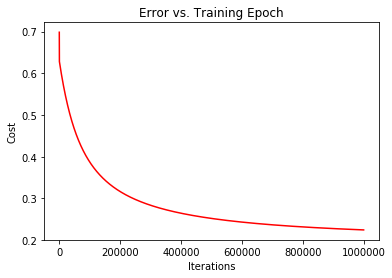

In [11]:
fig, ax = plt.subplots()  
ax.plot(np.arange(len(cost)), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
plt.show()

Struggle with finding proper alpha and iterations.. I also spend some time Googling for 'logistic regression from scratch'.. Let's try again using optimise methods. I also took the habit of having 2 dimensions for X and one dimension for theta and y.

In [12]:
def sigmoid(x):                                        
    return 1.0 / (1 + np.exp(-x))

In [13]:
def h(theta, X):
    return sigmoid(X.dot(theta))

In [14]:
def loss_function(theta, y, X, _lambda):
    cost = (1.0 / len(y)) * (-y.dot(np.log(h(theta, X))) - (1 - y).dot(np.log(1 - h(theta,X))))
    return cost + (_lambda / (2 * len(y)) * (theta ** 2).sum())

In [15]:
def gradient(theta, y, X, _lambda):
    
    theta = theta.reshape(len(theta), 1)
    y = y.reshape(len(y), 1)
        
    grad = np.sum(X * (h(theta, X) - y), axis=0)
    
    reg = ((_lambda / len(y)) * theta).reshape(len(theta))
    reg[0] = 0
    
    
    return (grad / len(y)) + reg

In [16]:
def logistic_regression(X, y, _lambda, intercept=True):
    if intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    
    m, n = X.shape
    theta = np.zeros(n)
    
    print('theta', theta.shape)
    print('X', X.shape)
    print('y', y.shape)
    
    result = op.minimize(fun=loss_function, x0=theta, args=(y, X, _lambda), method='TNC', jac=gradient)
    
    return result.x

In [17]:
optimal_theta = logistic_regression(X, y, 0)

theta (3,)
X (100, 3)
y (100,)


For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

In [18]:
my_student = np.array([[1, 45, 85]])

In [19]:
sigmoid(my_student @ optimal_theta)

array([0.77629063])

Plotting decision boundary. 2 points are needed in order to plot a line on 2D graph.

In [20]:
plot_x = np.array([X[:,0].min(),  X[:,0].max()])
plot_y = (-1.0/optimal_theta[2]) * (optimal_theta[1] * plot_x + optimal_theta[0])

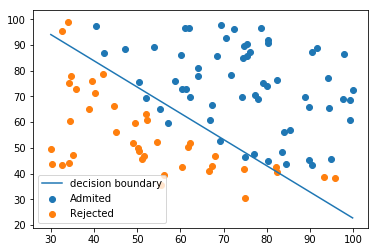

In [21]:
fig, ax = plt.subplots()
ax.scatter(X[y==1,0], X[y==1,1], label='Admited')
ax.scatter(X[y==0,0], X[y==0,1], label='Rejected')
ax.plot(plot_x, plot_y, label='decision boundary')
ax.legend()
plt.show()

### Regularized logistic regression

I already modified previous function so that setting _lambda to a value diferent than 0 enable regularisation

In [22]:
data = []
with open('./data/ex2data2.txt') as f:
    for line in f:
        data.append(line.strip().split(','))
data = np.array(data).astype(np.float64)
print(data.shape)

(118, 3)


In [23]:
X = data[:,:2]
y = data[:,2]

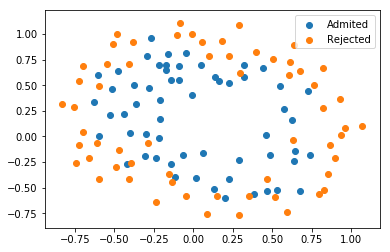

In [24]:
fig, ax = plt.subplots()
ax.scatter(X[y==1,0], X[y==1,1], label='Admited')
ax.scatter(X[y==0,0], X[y==0,1], label='Rejected')
ax.legend()
plt.show()

In [25]:
# scikit
reg = LogisticRegression(fit_intercept=True, C = 1e20, solver='lbfgs', max_iter=10000)
reg.fit(X,y)
reg.score(X,y)
print(reg.intercept_)
print(reg.coef_)

[-0.01418621]
[[-0.30352121 -0.01813235]]


In [26]:
# scikit with regularisation 'C'
reg = LogisticRegression(fit_intercept=True, C = 1, solver='lbfgs', max_iter=10000)
reg.fit(X,y)
reg.score(X,y)
print(reg.intercept_)
print(reg.coef_)

[-0.0174072]
[[-0.26541433 -0.01162176]]


In [27]:
optimal_theta = logistic_regression(X, y, 0)
print('without regularisation', optimal_theta)

optimal_theta = logistic_regression(X, y, 1)
print('with regularisation', optimal_theta)

theta (3,)
X (118, 3)
y (118,)
without regularisation [-0.01418036 -0.3035692  -0.01812414]
theta (3,)
X (118, 3)
y (118,)
with regularisation [-0.01740155 -0.26545612 -0.01162128]


# Multi-class logistic regression  
https://www.kaggle.com/anthonysegura/logistic-regression-from-scratch

In [28]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [29]:
print('X ', X.shape, 'y ', y.shape)

X  (150, 4) y  (150,)


In [30]:
np.unique(y)

array([0, 1, 2])

In [31]:
# lales
k = len(np.unique(y))
# features
n = X.shape[1]

print(k, n)

all_theta = np.zeros((k, n+1))
i = 0
for species in np.unique(y):
    #set the labels in 0 and 1
    tmp_y = np.array(y == species, dtype = int)
    optTheta = logistic_regression(X, tmp_y, 1)
    optTheta = np.reshape(optTheta,-1)
    all_theta[i] = optTheta
    i += 1

3 4
theta (5,)
X (150, 5)
y (150,)
theta (5,)
X (150, 5)
y (150,)
theta (5,)
X (150, 5)
y (150,)


In [32]:
intercept = np.ones((X.shape[0], 1))
features = np.hstack((intercept, X))
P = sigmoid(features.dot(all_theta.T)) # probability for each flower
p = [np.unique(y)[np.argmax(P[i, :])] for i in range(features.shape[0])]

In [33]:
all_theta

array([[ 0.64238544,  0.35837049,  1.3934165 , -2.21888292, -1.03723764],
       [ 1.56690045,  0.26648941, -1.60694417,  0.75464715, -1.5973218 ],
       [-1.53456107, -1.8858342 , -1.37683813,  2.61952416,  2.69176555]])

In [38]:
# let's compute the score of our algorithm
success = np.array(y==p)
success.mean()

0.9533333333333334

In [39]:
# scikit
reg = LogisticRegression(fit_intercept=True, C = 1, solver='lbfgs', max_iter=1000, multi_class='ovr')
reg.fit(X,y)
print(reg.score(X,y))
print(reg.intercept_)
print(reg.coef_)

0.9533333333333334
[  6.69040651   5.58615272 -14.43121671]
[[-0.44501376  0.89999242 -2.32353827 -0.97345836]
 [-0.1792787  -2.12866718  0.69665417 -1.27480129]
 [-0.39444787 -0.5133412   2.93087523  2.41709879]]


TODO:
- feature mapping => add polynomial for non-linear
- plotting the decision boundary